# Introdução à pySpark com Dados do Kaggle

Como prometido num Post anterior, hoje eu vou fazer meu primeiro tutorial de *Apache Spark*. Para isso, usaremos o *dataset* público do *e-commerce* brasileiro Olist. Esse *dataset* está disponível no Kaggle e você pode acessá-lo [aqui](https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv). Ele contém dados de mais de 100k vendas feitas no site entre os anos de 2016 e 2018, informações de compradores, vendedores e *reviews*. Esse *dataset* contém 9 tabelas, mas nesse tutorial só trabalharemos com 3. Antes de passar pro código, eu recomendo que você leia [meu post anterior no qual falo sobre o ecossistema Spark](https://www.xicoreborn.com/post/1).

## Importando pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### `SparkSession`
A sessão do Spark é o que permite que o python interaja com o Spark. `SparkSession` é o que permite que DataFrames sejam criados, o registro de DataFrames como tabelas, o uso de queries SQL para manipulação de Dados, *cache* de tabelas e leitura de arquivos. `builder` é o método que quando invocado, constrói a sessão.

`master()` é um método de `builder` que define a URL master que o spark se conecta, se for "local[x]", ele rodará localmente em *x* núcleos. O *\** diz ao Spark para se conectar ao total de núcleos da CPU. `.getOrCreate()` se conecta a uma sessão, caso uma seja encontrada, do contrário, o Spark cria uma sessão baseado nas opções do *builder*

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("Intro Spark - olist") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

## Carregando dados

In [3]:
database_path = "../data/olist_dataset"

In [4]:
from os.path import join

# Vamos carregar os arquivos do nosso database
orders_dataset = spark.read.csv(join(database_path,"olist_orders_dataset.csv"), 
                                inferSchema=True, 
                                header=True)

print("Número de pedidos do DB: %d" % orders_dataset.count())
orders_dataset.limit(5)\
              .toPandas()

Número de pedidos do DB: 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# Vamos carregar os arquivos do nosso database
order_payments_dataset = spark.read.csv(join(database_path,"olist_order_payments_dataset.csv"),
                                        inferSchema=True, 
                                        header=True)

print("Número de reviews do DB: %d" % order_payments_dataset.count())
order_payments_dataset.limit(5)\
                      .toPandas()

Número de reviews do DB: 103886


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# Vamos carregar os arquivos do nosso database
customers_dataset = spark.read.csv(join(database_path,"olist_customers_dataset.csv"), 
                                   inferSchema=True, 
                                   header=True)
print("Número de consumidores do DB: %d" % customers_dataset.count())
customers_dataset.limit(5).toPandas()

Número de consumidores do DB: 99441


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Como visualizar os dados no Spark
Sei que já dei uma prévia no item anterior, mas vamos lá...
O *Spark* oferece algumas formas de visualização dos dados, as mais comuns sendo: `.toPandas()`, `.show()` e `.printSchema()`.

`.toPandas()` como o nome já diz, ele transforma nosso *dataframe* em um *pandas dataframe*, principalmente quando trabalhamos com *notebooks*, essa é uma opção interessante por ser visualmente mais agradável. É importante observar que antes de chamar esse método, chamamos outro método, `.limit()`, que define quantas linhas queremos realizar as operações. Isso é importante pois evitamos o desperdicio de processamento. Lembre-se que *Spark* utiliza *Lazy Evaluation* e se transformarmos todo nosso *dataframe* em *pandas* poderemos perder muito tempo esperando o resultado, quando queremos apenas visualizar algumas linhas.

In [7]:
customers_dataset.limit(5)\
                 .toPandas()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Outra opção é o método `.show()`, ele imprime só *dataframe* (veja que `.toPandas()` converte o *dataframe*). Este método aceita 3 argumentos. O primeiro diz quantas linhas queremos imprimir. O segundo, *truncate*, diz se queremos ou não que *strings* com mais de 20 caracteres sejam truncadas. O terceiro diz se as linhas devem ser impressas na vertical. Veja nos exemplos a seguir como os resultados podem ficar um pouco feios e de difícil visualização.

In [8]:
orders_dataset.show(5, False)

+--------------------------------+--------------------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+
|order_id                        |customer_id                     |order_status|order_purchase_timestamp|order_approved_at  |order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|
+--------------------------------+--------------------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+
|e481f51cbdc54678b7cc49136f2d6af7|9ef432eb6251297304e76186b10a928d|delivered   |2017-10-02 10:56:33     |2017-10-02 11:07:15|2017-10-04 19:55:00         |2017-10-10 21:25:13          |2017-10-18 00:00:00          |
|53cdb2fc8bc7dce0b6741e2150273451|b0830fb4747a6c6d20dea0b8c802d7ef|delivered   |2018-07-24 20:41:37     |2018-07-26 03:24:27|2018-07-26 14:3

In [9]:
orders_dataset.show(5, True)

+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+
|            order_id|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|
+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+
|e481f51cbdc54678b...|9ef432eb625129730...|   delivered|     2017-10-02 10:56:33|2017-10-02 11:07:15|         2017-10-04 19:55:00|          2017-10-10 21:25:13|          2017-10-18 00:00:00|
|53cdb2fc8bc7dce0b...|b0830fb4747a6c6d2...|   delivered|     2018-07-24 20:41:37|2018-07-26 03:24:27|         2018-07-26 14:31:00|          2018-08-07 15:27:45|          2018-08-13 00:00:00|
|47770eb9100c2d0c4...|41ce2a54c0b03bf34...|  

O último método imprime o *schema* dos nossos dados

In [10]:
orders_dataset.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- order_approved_at: string (nullable = true)
 |-- order_delivered_carrier_date: string (nullable = true)
 |-- order_delivered_customer_date: string (nullable = true)
 |-- order_estimated_delivery_date: string (nullable = true)



### Iniciando os trabalhos
A primeira coisa que devemos fazer é o *casting* dos dados. Isto é, verificar se os tipos dos nossos dados estão no formato certo. Assim, evitaremos que futuramente tenhamos problemas no nosso código e tenhamos que quebrar a cabeça tentando encontrá-los, ou pior, que eles passem despercebidos e impliquem em erros em nossa análise.

In [11]:
orders_dataset.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- order_approved_at: string (nullable = true)
 |-- order_delivered_carrier_date: string (nullable = true)
 |-- order_delivered_customer_date: string (nullable = true)
 |-- order_estimated_delivery_date: string (nullable = true)



Veja que as colunas `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`,
       `order_delivered_customer_date`, `order_estimated_delivery_date` são *timestamp*. Podemos converter tipos no Spark com os métodos `cast()` e `withColumn()`, mas como nossa *string* já tá formatada, podemos utilizar a função `to_timestamp()`.

- `cast()` converte tipos no Spark
- `withColumn()` retorna um novo DataFrame ao adicionar uma nova coluna ou substituindo uma por outra de mesmo novo.
- `to_timestamp()` converte tipos para o formato `TimestampType`, mas permite que seja passado o formato do *timestamp*.

Como não podemos estimar a hora da entrega, converteremos `order_estimated_delivery_date` para o formato `DataType`.

In [12]:
from pyspark.sql import functions as f


In [13]:
orders_dataset = orders_dataset.withColumn("order_purchase_timestamp",
                                  f.to_timestamp(orders_dataset.order_purchase_timestamp, 
                                            "yyyy-MM-dd HH:mm:ss"))\
                                .withColumn("order_approved_at",
                                  f.to_timestamp(orders_dataset.order_approved_at, 
                                            "yyyy-MM-dd HH:mm:ss"))\
                                .withColumn("order_delivered_carrier_date",
                                  f.to_timestamp(orders_dataset.order_delivered_carrier_date, 
                                            "yyyy-MM-dd HH:mm:ss"))\
                                .withColumn("order_delivered_customer_date",
                                  f.to_timestamp(orders_dataset.order_delivered_customer_date, 
                                            "yyyy-MM-dd HH:mm:ss"))\
                                .withColumn("order_estimated_delivery_date",
                                  f.to_date(orders_dataset.order_estimated_delivery_date, 
                                            "yyyy-MM-dd HH:mm:ss"))
orders_dataset.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: timestamp (nullable = true)
 |-- order_approved_at: timestamp (nullable = true)
 |-- order_delivered_carrier_date: timestamp (nullable = true)
 |-- order_delivered_customer_date: timestamp (nullable = true)
 |-- order_estimated_delivery_date: date (nullable = true)



Outra forma de aplicar essas mesmas transformações, mas de forma menos repetitiva seria:

In [14]:
timestamp_columns = ["order_purchase_timestamp", "order_approved_at",
                    "order_delivered_carrier_date", "order_delivered_customer_date"]

In [15]:
for col in timestamp_columns:
    orders_dataset = orders_dataset.withColumn(col,
                                  f.to_timestamp(orders_dataset[col], 
                                            "yyyy-MM-dd HH:mm:ss"))
    
orders_dataset = orders_dataset.withColumn("order_estimated_delivery_date",
                                  f.to_date(orders_dataset.order_estimated_delivery_date, 
                                            "yyyy-MM-dd HH:mm:ss"))

In [16]:
order_payments_dataset.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- payment_sequential: integer (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- payment_installments: integer (nullable = true)
 |-- payment_value: double (nullable = true)



In [17]:
customers_dataset.printSchema()

root
 |-- customer_id: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: integer (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)



Os *DataFrame* `order_payments_dataset` e `customers_dataset` não precisaram de conversão de tipos.

Uma vez com nossos dados com seus tipos corretamente definidos, devemos olhar as estatísticas descritivas deles, para entendermos melhor como funciona a destribuição de seus atributos. Podemos fazer isso no Spark com o método `.describe()`.

Obs: Pra valores não numéricos esse método não é de grande utilidade.

In [18]:
order_payments_dataset.describe().show()


+-------+--------------------+------------------+------------+--------------------+------------------+
|summary|            order_id|payment_sequential|payment_type|payment_installments|     payment_value|
+-------+--------------------+------------------+------------+--------------------+------------------+
|  count|              103886|            103886|      103886|              103886|            103886|
|   mean|                null|1.0926785129853878|        null|   2.853348863176944|154.10038041698792|
| stddev|                null|0.7065837791949958|        null|   2.687050673856492|  217.494063864724|
|    min|00010242fe8c5a6d1...|                 1|      boleto|                   0|               0.0|
|    max|fffe41c64501cc87c...|                29|     voucher|                  24|          13664.08|
+-------+--------------------+------------------+------------+--------------------+------------------+



### Começando a modelagem dos dados com `.select()`
`.select()` permite que você realize uma série de operações e retorne um novo *dataframe*

In [19]:
# Selecionando só um subconjunto de colunas

orders_dataset.select("order_id","order_status","order_estimated_delivery_date")\
                .limit(5)\
                .toPandas()

,order_id,order_status,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-26


In [20]:
# Também podemos usar `select()` aplicando funções

orders_dataset.select("order_id","order_status",
                     f.dayofweek(orders_dataset.order_estimated_delivery_date)\
                      .alias("order_estimated_delivery_day_of_week"))\
                .limit(5)\
                .toPandas()

,order_id,order_status,order_estimated_delivery_day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,4
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,3
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,6
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2


### Filtrando resultados com `DataFrame.where()`
O Spark oferece as funções `.where()` e `.filter()`. Ambas são identicas e elas existem para que o programador use a nomeclatura que ele estiver mais familiarizado. Inclusive `where()`nada mais é que um *alias* de `filter()`. Veja a documentação [aqui](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.filter.html?highlight=filter#pyspark.sql.DataFrame.filter).

In [21]:
# Podemos combinar `where()` com `select()`
orders_dataset.select("order_id",
                      "order_status",
                      "order_estimated_delivery_date")\
                .where("order_status=='shipped'") \
                .limit(5)\
                .toPandas()

,order_id,order_status,order_estimated_delivery_date
0,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-28
1,6942b8da583c2f9957e990d028607019,shipped,2018-02-07
2,36530871a5e80138db53bcfd8a104d90,shipped,2017-06-08
3,4d630f57194f5aba1a3d12ce23e71cd9,shipped,2017-12-13
4,3b4ad687e7e5190db827e1ae5a8989dd,shipped,2018-08-03


In [22]:
# Também podemos passar funções para where() e filter()

orders_dataset.select("order_id",
                      "order_status",
                      "order_estimated_delivery_date")\
                .where("order_status=='canceled'") \
                .filter(f.month(orders_dataset["order_estimated_delivery_date"]) == 12) \
                .limit(5)\
                .toPandas()

,order_id,order_status,order_estimated_delivery_date
0,3388fa275fc1b344e275af704e8d3156,canceled,2017-12-28
1,63802c52ced9ff923c962ecbf4b3a2a2,canceled,2017-12-26
2,7aa23447e2b8d82e2355605aeac705b4,canceled,2017-12-07
3,f823e090c5fffc41f7a863aa7c66e34a,canceled,2017-12-20
4,815c1f60c4896764d6d70b7fea63863b,canceled,2017-12-01


In [23]:
# Outra forma de escrever a expressão acima

orders_dataset.select("order_id",
                      "order_status",
                      "order_estimated_delivery_date")\
                .where((f.col("order_status")=='canceled') & \
                        (f.month(orders_dataset["order_estimated_delivery_date"]) == 12)) \
                .limit(5)\
                .toPandas()

,order_id,order_status,order_estimated_delivery_date
0,3388fa275fc1b344e275af704e8d3156,canceled,2017-12-28
1,63802c52ced9ff923c962ecbf4b3a2a2,canceled,2017-12-26
2,7aa23447e2b8d82e2355605aeac705b4,canceled,2017-12-07
3,f823e090c5fffc41f7a863aa7c66e34a,canceled,2017-12-20
4,815c1f60c4896764d6d70b7fea63863b,canceled,2017-12-01


Podemos verificar os valores únicos de uma coluna com o método `distinct()`

In [24]:
orders_dataset.select("order_status").distinct().show()

+------------+
|order_status|
+------------+
|     shipped|
|    canceled|
|    invoiced|
|     created|
|   delivered|
| unavailable|
|  processing|
|    approved|
+------------+



### Trabalhando com grupos
Tal qual Pandas e SQL, podemos usar o método `.groupBy()` para agrupar nossos dados.

In [25]:
orders_dataset.groupBy("order_status")\
              .count().alias("total")\
              .show()

+------------+-----+
|order_status|count|
+------------+-----+
|     shipped| 1107|
|    canceled|  625|
|    invoiced|  314|
|     created|    5|
|   delivered|96478|
| unavailable|  609|
|  processing|  301|
|    approved|    2|
+------------+-----+



Também podemos aplicar várias funções usando o método `.agg()`

In [26]:
order_payments_by_payment_type = order_payments_dataset.groupBy("payment_type")\
                                                       .agg(f.count("payment_type").alias("total_of_orders"),
                                                              f.min("payment_value").alias("minimum_order"),
                                                              f.mean("payment_value").alias("average_order"),
                                                              f.max("payment_value").alias("maximum_order"))
order_payments_by_payment_type.show()


+------------+---------------+-------------+------------------+-------------+
|payment_type|total_of_orders|minimum_order|     average_order|maximum_order|
+------------+---------------+-------------+------------------+-------------+
|      boleto|          19784|        11.62|145.03443540234633|      7274.88|
| not_defined|              3|          0.0|               0.0|          0.0|
| credit_card|          76795|         0.01|163.31902063935996|     13664.08|
|     voucher|           5775|          0.0| 65.70335411255414|      3184.34|
|  debit_card|           1529|        13.38|142.57017004578165|       4445.5|
+------------+---------------+-------------+------------------+-------------+



### Como juntar *dataframes* com `.join()`
Também é muito parecido com o que vemos em Pandas e SQL e aceita 2 argumentos *on* e *how*. *on* na verdade é a condicional da união, pode ser tanto a coluna, uma lista de colunas e como uma expressão customizada.

In [27]:
complete_orders_dataset = orders_dataset.join(order_payments_dataset,
                                              on="order_id",
                                              how="left")
complete_orders_dataset.limit(5)\
                        .toPandas()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12


In [28]:
cond = orders_dataset.order_id == order_payments_dataset.order_id
orders_dataset.join(order_payments_dataset,
                        on=cond,
                        how="left")\
              .limit(5)\
              .toPandas()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,e481f51cbdc54678b7cc49136f2d6af7,2,voucher,1,18.59
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,e481f51cbdc54678b7cc49136f2d6af7,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,e481f51cbdc54678b7cc49136f2d6af7,1,credit_card,1,18.12
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,53cdb2fc8bc7dce0b6741e2150273451,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,47770eb9100c2d0c44946d9cf07ec65d,1,credit_card,3,179.12


Os dois *dataframes* resultantes são extritamente iguais.

### Adicionando e removendo colunas
Como vimos, podemos criar novas colunas com a função `withColumn()` e remover colunas com a função `drop()`. Para deixar o exemplo mais interessante, iremos criar uma coluna normalizada. Então teremos alguns passos intermediários.

In [29]:
payment_value_limits = order_payments_dataset.select(f.min(f.col("payment_value")).alias("min"),
                                                     f.max(f.col("payment_value")).alias("max"))
payment_value_limits.show()

+---+--------+
|min|     max|
+---+--------+
|0.0|13664.08|
+---+--------+



In [30]:
normalizer = (f.col("payment_value") - f.col("min"))/(f.col("max") - f.col("min"))
order_payments_with_norm = order_payments_dataset.join(payment_value_limits)\
                                                .withColumn("payment_normalized",normalizer)

order_payments_with_norm.limit(5)\
                        .toPandas()


,order_id,payment_sequential,payment_type,payment_installments,payment_value,min,max,payment_normalized
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0.0,13664.08,0.007269
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,0.0,13664.08,0.001785
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,0.0,13664.08,0.004809
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,0.0,13664.08,0.007888
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,0.0,13664.08,0.009401


Como nossa intenção era só adicionar a coluna normalizada, podemos excluir as colunas *min* e *max* com o método `drop()`.

In [31]:
order_payments_with_norm.drop(*["min","max"])\
                        .orderBy(order_payments_with_norm["payment_normalized"].desc())\
                        .limit(5)\
                        .toPandas()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,payment_normalized
0,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,1.000000
1,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,0.532409
2,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,0.507119
3,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,0.506599
4,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,0.492288


O exemplo a seguir é uma adaptação do anterior, mas para deixá-lo um pouco mais interessante, ao invés de apenas normalizarmos a coluna *payment_value*, iremos normalizá-la, mas pelo tipo de pagamento.

In [32]:
order_payments_by_payment_type.show()

+------------+---------------+-------------+------------------+-------------+
|payment_type|total_of_orders|minimum_order|     average_order|maximum_order|
+------------+---------------+-------------+------------------+-------------+
|      boleto|          19784|        11.62|145.03443540234633|      7274.88|
| not_defined|              3|          0.0|               0.0|          0.0|
| credit_card|          76795|         0.01|163.31902063935996|     13664.08|
|     voucher|           5775|          0.0| 65.70335411255414|      3184.34|
|  debit_card|           1529|        13.38|142.57017004578165|       4445.5|
+------------+---------------+-------------+------------------+-------------+



Para evitar problemas na hora de normalizar os dados, excluiremos todas as instâncias onde `payment_type=='not_defined'`

In [33]:
cols = ["payment_type", "minimum_order", "maximum_order"]

normalizer = (f.col("payment_value") - f.col("minimum_order"))/(f.col("maximum_order") - f.col("minimum_order"))

order_payments_norm_by_type = order_payments_dataset.join(order_payments_by_payment_type.select(*cols),
                                                       on="payment_type",
                                                       how="inner")\
                                                    .where(f.col("payment_type")!="not_defined")\
                                                    .withColumn("payment_normalized_by_type",normalizer)\
                                                    .drop(*["minimum_order","maximum_order"])
                                                    

order_payments_norm_by_type.orderBy(order_payments_norm_by_type["payment_normalized_by_type"].desc())\
                           .limit(5)\
                           .toPandas()

,payment_type,order_id,payment_sequential,payment_installments,payment_value,payment_normalized_by_type
0,boleto,736e1922ae60d0d6a89247b851902527,1,1,7274.88,1.0
1,credit_card,03caa2c082116e1d31e67e9ae3700499,1,1,13664.08,1.0
2,voucher,03310aa823a66056268a3bab36e827fb,1,1,3184.34,1.0
3,debit_card,d2f270487125ddc41fd134c4003ad1d7,1,1,4445.50,1.0
4,voucher,7813842ae95e8c497fc0233232ae815a,1,1,3184.34,1.0


### Análises
Agora que eu já apresentei o básico de como mexer com dados no Spark, vamos fazer algumas análises exploratórias em dados e ver que tipo de padrões nós conseguimos encontrar.

In [34]:
orders_dataset_complete = orders_dataset.join(order_payments_dataset, on="order_id")\
                                        .join(customers_dataset, on="customer_id")
orders_dataset_complete.limit(5)\
                       .toPandas()

,customer_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [35]:
# Cálculo de quantas compras com valores nulos ocorreram, assim não precisaremos filtrar esses dados
orders_dataset_complete.select("*")\
                        .where(f.isnan("payment_value") | f.col("payment_value").isNull())\
                        .count()

0

In [36]:
non_timestamp_columns = ['customer_id',
                         'order_id',
                         'order_status',
                         'payment_sequential',
                         'payment_type',
                         'payment_installments',
                         'payment_value',
                         'customer_unique_id',
                         'customer_zip_code_prefix',
                         'customer_city',
                         'customer_state']


In [37]:
# Podemos verificar a ocorrencia de valores nulos em todas as colunas da seguinte forma

orders_dataset_complete.select([f.count(f.when((f.col(c) == '') | f.col(c).isNull() | f.isnan(c), c)).alias(c) \
                                    for c in non_timestamp_columns]).toPandas()

,customer_id,order_id,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,0,0,0,0,0,0,0,0,0,0


<h5 style="color:red">OBS!!!</h5>

Excluí as colunas do formato *timestamp*, pois a expressão `f.isnan(c)` quando *c* é *timestamp* retorna erro de `AnalysisException`. O que acredito que fuja um pouco ao foco desse tutorial, mas caso você queira verificar se existe algum valor nulo nessas colunas, podemos fazer o seguinte:

In [38]:
# Podemos verificar a ocorrencia de valores nulos em todas as colunas da seguinte forma

timestamp_columns = ['order_purchase_timestamp',
                     'order_approved_at',
                     'order_delivered_carrier_date',
                     'order_delivered_customer_date',
                     'order_estimated_delivery_date']

orders_dataset_complete.select([f.count(f.when((f.col(c) == '') | f.col(c).isNull(), c)).alias(c) \
                                    for c in timestamp_columns]).toPandas()


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,175,1888,3132,0


In [39]:
# Vendo que tipos de dados tem essas colunas nulas
orders_dataset_complete.select("*")\
                    .where((f.col("order_delivered_customer_date") == '') | f.col("order_delivered_customer_date").isNull())\
                    .limit(5)\
                    .toPandas()

,customer_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,ed0271e0b7da060a393796590e7b737a,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1,credit_card,1,65.95,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS
1,caded193e8e47b8362864762a83db3c5,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,1,boleto,1,22.36,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP
2,d2a79636084590b7465af8ab374a8cf5,0760a852e4e9d89eb77bf631eaaf1c84,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,1,boleto,1,50.35,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC
3,f3f0e613e0bdb9c7cee75504f0f90679,15bed8e2fec7fdbadb186b57c46c92f2,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,1,credit_card,2,138.28,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP
4,52006a9383bf149a4fb24226b173106f,6942b8da583c2f9957e990d028607019,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,1,boleto,1,69.12,528b011eb7fab3d59c336cc7248eed3a,38600,paracatu,MG


Os valores nulos que aparecem em algumas colunas (apenas algumas de datas) são de pedidos que apresentam `status_code != 'delivered'`, ou os pedidos ainda estão sendo processadas, ou ainda não chegaram, ou foram cancelados. Poderíamos tratar esses dados, olhar apenas os pedidos que deram certos, mas não vou me estender demais nesse tema, o foco aqui é *Spark*.

### Plotando gráficos com  *DataFrames Spark*

In [40]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [41]:
orders_per_state = orders_dataset_complete.groupBy("customer_state")\
                                          .agg(f.count("customer_state").alias("total_orders"),
                                              f.mean("payment_value").alias("average_payement"),
                                              f.sum("payment_value").alias("total_payement"))\
                                          .orderBy(f.col("total_orders").desc())


<AxesSubplot:title={'center':'Total orders per state'}, xlabel='customer_state', ylabel='total_orders'>

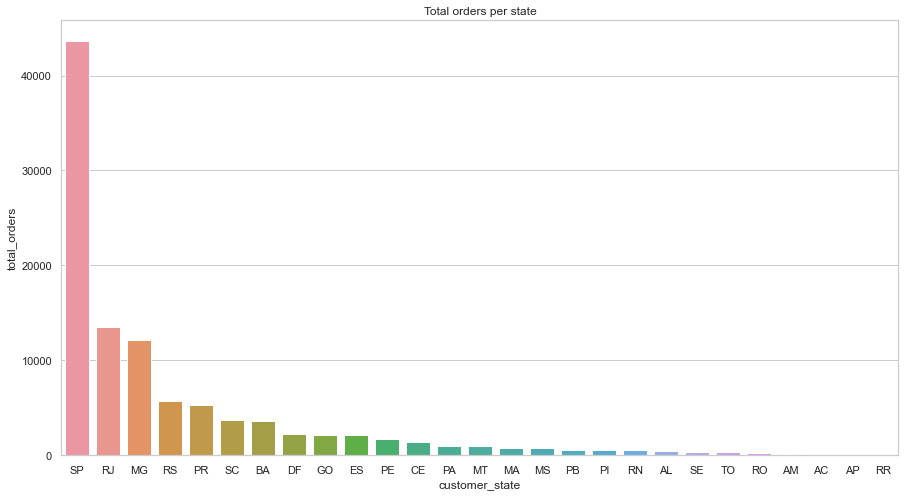

In [42]:
plt.figure(figsize=(15,8))
plt.title("Total orders per state")

sns.barplot(x="customer_state",y="total_orders", data=orders_per_state.toPandas())

<AxesSubplot:title={'center':'Average payement per state'}, xlabel='customer_state', ylabel='average_payement'>

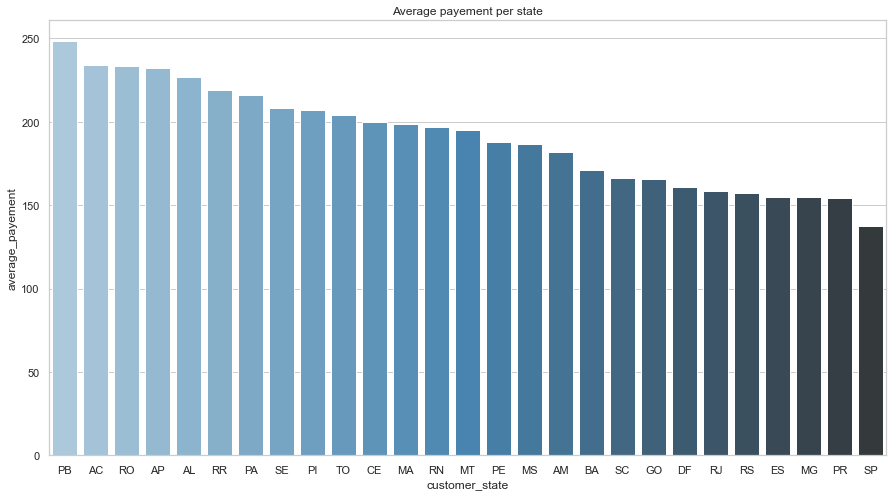

In [43]:
plt.figure(figsize=(15,8))
plt.title("Average payement per state")

sns.barplot(x="customer_state",y="average_payement", palette="Blues_d",
            data=orders_per_state.orderBy(f.col("average_payement").desc()).toPandas())

Veja que SP é o estado que mais faz pedidos na plataforma Olist, mas, em compensação tem o menor ticket médio. Claro que não podemos tirar conclusões precipitadas, mas talvez fosse interessante para a empresa investir na divulgação da Plataforma no Norte-Nordeste, uma vez que nessas regiões o usuário médio está propenso a gastar mais.

In [44]:
orders_per_month = orders_dataset_complete.groupBy(f.month("order_purchase_timestamp").alias("month"))\
                                          .agg(f.count("customer_state").alias("total_orders"),
                                              f.mean("payment_value").alias("average_payement"),
                                              f.sum("payment_value").alias("total_payement"))\
                                          .orderBy(f.col("month"))
orders_per_month.toPandas()

,month,total_orders,average_payement,total_payement
0,1,8413,148.994677,1253492.22
1,2,8838,145.323755,1284371.35
2,3,10349,155.523792,1609515.72
3,4,9780,161.408334,1578573.51
4,5,11079,157.676773,1746900.97
5,6,9855,155.774417,1535156.88
6,7,10824,153.263458,1658923.67
7,8,11248,150.855409,1696821.64
8,9,4535,161.511407,732454.23
9,10,5206,161.228972,839358.03


<AxesSubplot:title={'center':'Total payement per month'}, xlabel='month', ylabel='total_payement'>

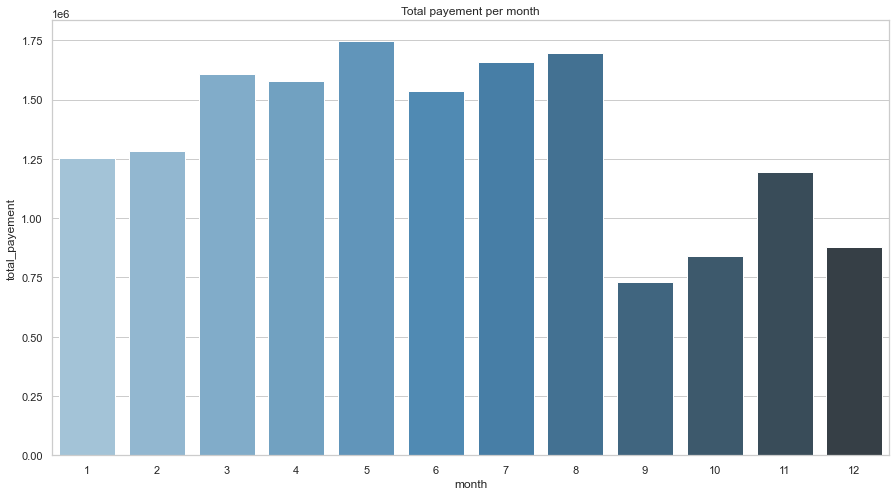

In [45]:
plt.figure(figsize=(15,8))
plt.title("Total payement per month")

sns.barplot(x="month",y="total_payement", palette="Blues_d",
            data=orders_per_month.toPandas())

Observamos um padrão estranho de vendas caindo consideravelmente a partir do mês de Setembro. O quê poderá estar causando isso? Também não vemos o impacto das vendas de final de ano no valor médio das vendas.



In [46]:
orders_dataset_complete.orderBy(f.col("order_purchase_timestamp").desc()).limit(20).toPandas()

,customer_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,a4b417188addbc05b26b72d5e44837a1,10a045cdf6a5650c21e9cfeb60384c16,canceled,2018-10-17 17:30:18,NaT,NaT,NaT,2018-10-30,1,voucher,1,89.71,87ab9fec999db8bd5774917de3cdf01c,18077,sorocaba,SP
1,856336203359aa6a61bf3826f7d84c49,b059ee4de278302d550a3035c4cdb740,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,1,voucher,1,222.03,262e1f1e26e92e86375f86840b4ffd63,64600,picos,PI
2,4c2ec60c29d10c34bd49cb88aa85cfc4,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,1,voucher,1,197.55,af5454198a97379394cacf676e1e96cb,11900,registro,SP
3,bf6181a85bbb4115736c0a8db1a53be3,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,1,voucher,1,80.38,634420a0ea42302205032ed44ac7fccc,27175,pirai,RJ
4,2823ffda607a2316375088e0d00005ec,392ed9afd714e3c74767d0c4d3e3f477,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,1,voucher,1,137.03,9bb92bebd4cb7511e1a02d5e50bc4655,7176,guarulhos,SP
5,55c9dad94ec1a2ba57998bdb376c230a,869997fbe01f39d184956b5c6bccfdbe,canceled,2018-09-26 08:40:15,NaT,NaT,NaT,2018-10-25,1,voucher,1,94.63,ba84da8c159659f116329563a0a981dd,25635,petropolis,RJ
6,7a8a02e54cf3472df427e927f8b9c046,5aac76cf7b07dd06fa4d50bf461d2f40,canceled,2018-09-25 11:59:18,NaT,NaT,NaT,2018-10-11,1,voucher,1,221.54,9c3af16efacb7aa06aa3bc674556c5d6,30170,belo horizonte,MG
7,191984a8ba4cbb2145acb4fe35b69664,ed3efbd3a87bea76c2812c66a0b32219,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,1,voucher,1,191.46,08642cd329066fe11ec63293f714f2f8,33030,santa luzia,MG
8,ad2eb5d02c0808bcd8743117f6383cf6,bd35b677fd239386e9861d11ae98ab56,canceled,2018-09-17 17:21:16,NaT,NaT,NaT,2018-10-01,1,voucher,1,84.58,ef0103e9602d12594d19c2b666219bc1,30810,belo horizonte,MG
9,6ddc45ad08e6a2c885ca2255fc52d6df,ea844c92cf978ea23321fa7fe5871761,canceled,2018-09-13 09:56:12,NaT,NaT,NaT,2018-09-27,1,voucher,1,414.04,c1ee153508c6b785b491443a95ff364e,89300,mafra,SC


As vendas de 2018 pararam de ser computadas em Outubro. E todas as vendas a partir de 03/09/2018 estão com o status de cancelada. Nossos plots **não estão levando isso em consideração** e em análises reais, seria muito importante termos usado algum tipo de filtro. Se estivéssemos olhando nossa receita, por exemplo, poderiamos ter filtrado `status_code` e só selecionado instâncias quando ele estivesse *shipped* ou *delivered*. Se estivéssemos querendo ver a quantidade de receita que estamos perdendo com o cancelamento de vendas, poderíamos agrupar nossos dados pelo `status_code` e comparado o valor das vendas de *canceled* com *shipped* e *delivered*.

Deixo vocês com essa observação, mas por hoje é só. Creio que esse tutorial de *Spark* já está grande demais, mas conseguimos ver o básico da manipulação e visualização de dados com `pyspark.sql.DataFrame`.

Só tem mais uma coisa que precisamos falar sobre antes de terminar o tutorial.
### Salvando Dados no *Spark*
O *Apache Spark* oferece várias opções de salvamento de dados. Podemos salvá-los em formato *csv*, *parquet*, *orc*, dentre outros. Também termite que particionemos o *dataframe* na hora de salvar.

In [47]:
#Salvando somente o dataframe em um arquivo csv
orders_per_month.write.csv(join(database_path,"formated","orders_per_month"))


In [48]:
# Particionando o dataframe na hora de salvar
orders_dataset.write\
              .partitionBy("order_status")\
              .parquet(join(database_path,"formated","orders_dataset"))


In [49]:
import os

In [50]:
print(os.listdir(join(database_path,"formated", "orders_per_month")))

['._SUCCESS.crc', 'part-00000-d80fe80d-d7f6-43c0-be9c-08546eb89b2d-c000.csv', '.part-00000-d80fe80d-d7f6-43c0-be9c-08546eb89b2d-c000.csv.crc', '_SUCCESS']


In [51]:
print(os.listdir(join(database_path,"formated", "orders_dataset")))

['order_status=approved', 'order_status=shipped', 'order_status=invoiced', 'order_status=created', '._SUCCESS.crc', 'order_status=canceled', 'order_status=processing', 'order_status=unavailable', 'order_status=delivered', '_SUCCESS']


E quando terminar a sua análise, não se esqueça de encerrar a sessão!!

In [52]:
## Encerrando a sessão
spark.stop()
